In [ ]:
import sys
print("Python {} ".format(sys.version))
import scipy
print("Scipy {} ".format(scipy.__version__))
import numpy
print("Numpy {} ".format(numpy.__version__))
import matplotlib
print("Matplotlib {} ".format(matplotlib.__version__))
import sklearn
print("Sklearn {} ".format(sklearn.__version__))
import pandas
print("Panda {} ".format(pandas.__version__))

Python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0] 
Scipy 1.4.1 
Numpy 1.19.5 
Matplotlib 3.2.2 
Sklearn 0.22.2.post1 
Panda 1.1.5 


In [1]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [2]:
#loading the data 
url = "https://raw.githubusercontent.com/JonathanC13/ML-Iris-dataset/master/dataset/iris.csv"
names = ['sepal-length', 'sepal-widh', 'petal-length', 'petal-width', 'class']
dataset =read_csv(url, names=names)

In [3]:
#dimensions of dataset
print(dataset.shape)

(150, 5)


In [4]:
# take a peek at the data
print(dataset.head(20))

    sepal-length  sepal-widh  petal-length  petal-width        class
0            5.1         3.5           1.4          0.2  Iris-setosa
1            4.9         3.0           1.4          0.2  Iris-setosa
2            4.7         3.2           1.3          0.2  Iris-setosa
3            4.6         3.1           1.5          0.2  Iris-setosa
4            5.0         3.6           1.4          0.2  Iris-setosa
5            5.4         3.9           1.7          0.4  Iris-setosa
6            4.6         3.4           1.4          0.3  Iris-setosa
7            5.0         3.4           1.5          0.2  Iris-setosa
8            4.4         2.9           1.4          0.2  Iris-setosa
9            4.9         3.1           1.5          0.1  Iris-setosa
10           5.4         3.7           1.5          0.2  Iris-setosa
11           4.8         3.4           1.6          0.2  Iris-setosa
12           4.8         3.0           1.4          0.1  Iris-setosa
13           4.3         3.0      

In [5]:
#statestical summary
print(dataset.describe())

       sepal-length  sepal-widh  petal-length  petal-width
count    150.000000  150.000000    150.000000   150.000000
mean       5.843333    3.054000      3.758667     1.198667
std        0.828066    0.433594      1.764420     0.763161
min        4.300000    2.000000      1.000000     0.100000
25%        5.100000    2.800000      1.600000     0.300000
50%        5.800000    3.000000      4.350000     1.300000
75%        6.400000    3.300000      5.100000     1.800000
max        7.900000    4.400000      6.900000     2.500000


In [6]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-widh      AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

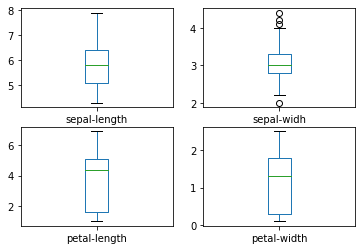

In [7]:
#univariate plot-box and whisker plot
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)

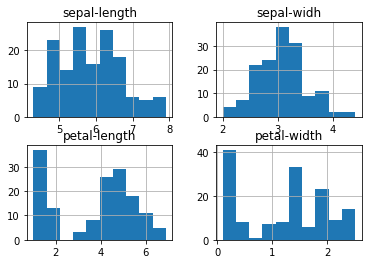

In [8]:
dataset.hist()
pyplot.show()

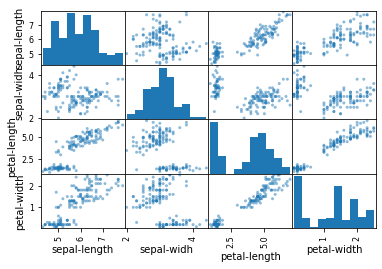

In [9]:
#multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [17]:
# creating a validation set
#splitting dataset
array = dataset.values
X=array[:, 0:4]
y=array[:, 4]
X_train, X_validation, y_train, y_validation=train_test_split(X,y, test_size=0.2, random_state=1)

In [18]:
#logistic regression
#linear discriminant analysis
#K-Nearest neighbors
#classification and regression trees
#gausian naive bayes
#support vector machines

#building models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [19]:
#evaluate the created models
results=[]
names=[]
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.933333 (0.042492)
LDA: 0.975000 (0.020412)
KNN: 0.941667 (0.033333)
NB: 0.941667 (0.033333)
SVM: 0.975000 (0.020412)


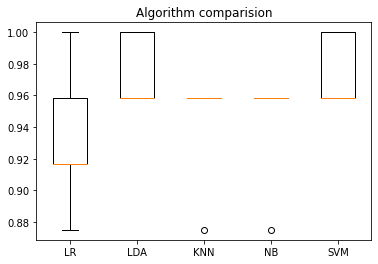

In [20]:
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm comparision')
pyplot.show()


In [23]:
#make predictions on svm
model=SVC(gamma='auto')
model.fit(X_train,y_train)
predictions=model.predict(X_validation)

In [24]:
#evaluate our predictions
print(accuracy_score(y_validation,predictions))
print(confusion_matrix(y_validation,predictions))
print(classification_report(y_validation,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

